# BonDNet bond dissociation energy prediction

This is a demo to show the use of BonDNet to predict the bond dissociation energies (BDEs) in a single moleucle. For more info on the BonDNet model and making predictions for multiple molecules in batch mode, see: https://github.com/mjwen/bondnet

In [2]:
from IPython.display import Image, display
from bondnet.prediction.predictor import predict_single_molecule

## Make predictions 
Here, we predcit the BDEs in an ethylene carbonate molecule. The prediction can be made by providing a `SMILES`, `InChI`, `sdf`, or `pdb` string representing the molecule.

In [3]:
model = "pubchem"

molecule = "C1COC(=O)O1"   # SMILES of ethylene carbonate
# molecule = "InChI=1S/C3H4O3/c4-3-5-1-2-6-3/h1-2H2"  # InChI of ethylene carbonate

figure_name = "prediction.png"

sdf = predict_single_molecule(model, molecule, ring_bond=False, figure_name=figure_name)

The `predict_single_molecule` function takes four argumeents:

- `model` (`"pubchem"` or `"mesd"`). This selects the dataset on which BonDNet is trained. Different dataset consists of different bond types (C-H, C-O, etc.) and bond dissociation types (homolytic or heterolytic), and thus may give different result for the same bond in the same molecule.   
- `molecule` is a string representation of the molecule whose BDEs are to be predicted.  
- `ring_bond` (`True` or `False`). Whether to make predictions for bonds in a ring. The `pubchem` dataset does not contain any BDEs for ring bond. So its error for ring bonds could be high. 
- `figure_name` is the name of the image file that stores the results. 

## Show predicitons in an image

The BDEs (in `eV`) are shown alongside the bonds highlighted in grey. Prediction is only made once for the same bonds (i.e. graphically isomorphic bonds). For example, the energies of the `1-8`, `2-9` and `2-10` C-H bonds are not shown since they are the same as the `1-7` bond. 

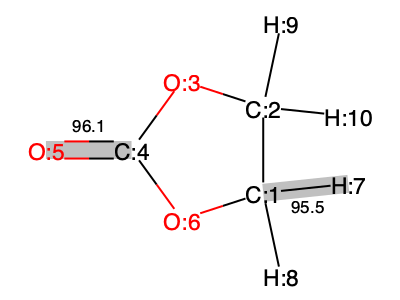

In [4]:
display(Image(figure_name))

## Show predicitons in SD format
You can also output the predicted BDEs in the SD format. The values are the 7th value in lines between `BEGIN BOND` and `End BOND`.

In [5]:
print(sdf)

C1COC(=O)O1
     RDKit          3D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 10 10 0 0 0
M  V30 BEGIN ATOM
M  V30 1 C -0.731084 -0.639275 -0.0783902 0
M  V30 2 C -0.501248 0.83538 -0.0138667 0
M  V30 3 O 0.823837 0.926135 0.474327 0
M  V30 4 C 1.45242 -0.231129 0.108733 0
M  V30 5 O 2.65276 -0.422145 0.198598 0
M  V30 6 O 0.55738 -1.14593 -0.370928 0
M  V30 7 H -1.06046 -1.05424 0.880213 0
M  V30 8 H -1.44816 -0.918444 -0.855026 0
M  V30 9 H -1.20191 1.34016 0.656634 0
M  V30 10 H -0.543532 1.30949 -1.00029 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2  
M  V30 2 1 2 3  
M  V30 3 1 3 4  
M  V30 4 2 4 5  96.05790710449219
M  V30 5 1 4 6  
M  V30 6 1 6 1  
M  V30 7 1 1 7  95.53532409667969
M  V30 8 1 1 8  
M  V30 9 1 2 9  
M  V30 10 1 2 10  
M  V30 END BOND
M  V30 END CTAB
M  END
$$$$

